<a href="https://colab.research.google.com/github/zhangchiyuan/colab_deep_learning/blob/master/Inception%20V3%20Image%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# Using InceptionV3 with Imagenet weights

### Testing for GPU 


To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU
 

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!ls

sample_data


### First we need to download the dependencies

In [4]:
!wget -qq https://www.dropbox.com/s/z1opzcqa6snjlp8/imagenet_sample.zip
  
!unzip -qq imagenet_sample.zip
!rm imagenet_sample.zip
!rm -r __MACOSX

!ls

imagenet  sample_data


### Imports

In [5]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline
import matplotlib.pyplot as plt
import os, json
from glob import glob

import tensorflow.keras
import tensorflow as tf

from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K

from keras.applications.imagenet_utils import preprocess_input, decode_predictions


from IPython.display import Image



Using TensorFlow backend.


In [6]:
print(tf.keras.__version__)
print(tf.__version__)

2.2.4-tf
2.1.0


### Loading the imagenet model

In [7]:
# create the base pre-trained model
model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

#model = vgg16.VGG16(weights='imagenet', include_top=True)

96116736/96112376 [==============================] - 8s 0us/step


In [0]:
image_path = './imagenet/'

In [9]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
len(model.layers)

313

In [11]:
!ls imagenet

african-elephant.jpg  elephant-02.jpg	    strawberry_1174.jpeg
b1.jpg		      hot-dog.jpg
dog.jpg		      strawberry_1157.jpeg


Input image shape: (1, 299, 299, 3)
Predicted: [[('n02504458', 'African_elephant', 0.667814), ('n01871265', 'tusker', 0.24733663), ('n02504013', 'Indian_elephant', 0.022769272), ('n02391049', 'zebra', 0.00032032424), ('n06785654', 'crossword_puzzle', 0.00031294677)]]


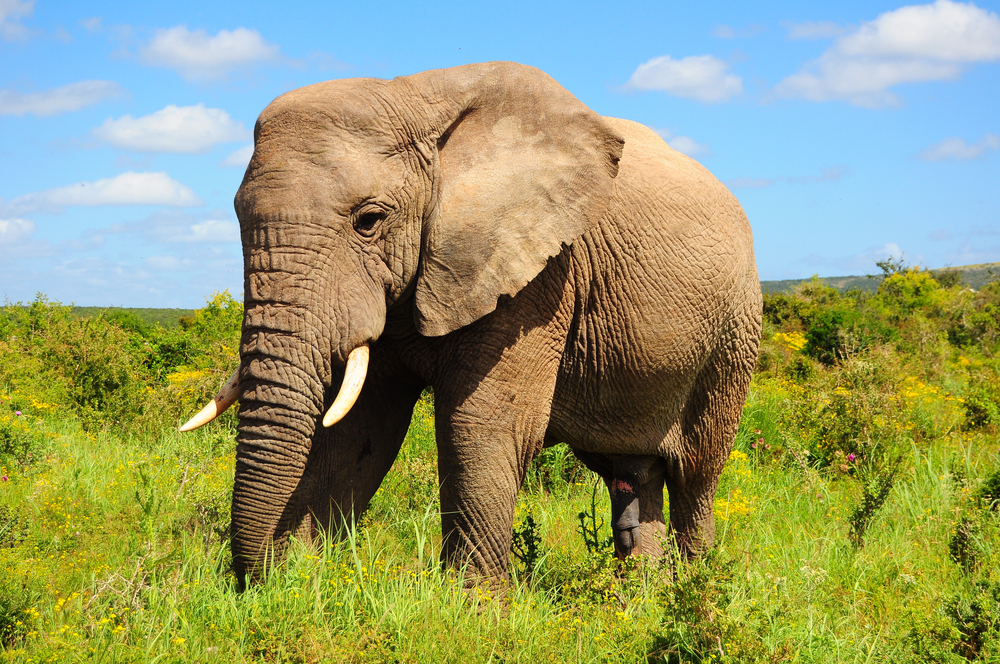

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = os.path.join(image_path, 'african-elephant.jpg')
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # making it a batch
x = inception_v3.preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Image(img_path)

Input image shape: (1, 299, 299, 3)
Predicted: [[('n07697537', 'hotdog', 0.9450474), ('n07697313', 'cheeseburger', 0.0008782222), ('n02120505', 'grey_fox', 0.00082965527), ('n03032252', 'cinema', 0.00071428757), ('n07716358', 'zucchini', 0.00057683396)]]


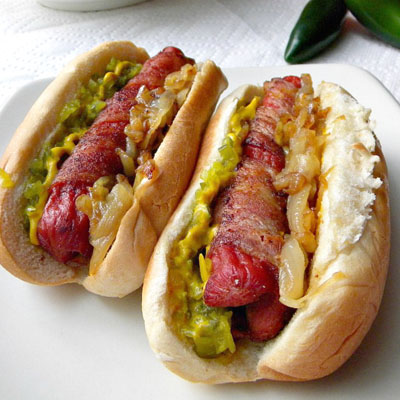

In [14]:
img_path = os.path.join(image_path, 'hot-dog.jpg')
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Image(img_path)


In [15]:
img_path = os.path.join(image_path, 'dog.jpg')
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 299, 299, 3)
Predicted: [[('n02108000', 'EntleBucher', 0.90455323), ('n02107908', 'Appenzeller', 0.014147333), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.0045651975), ('n03759954', 'microphone', 0.0030956345), ('n04265275', 'space_heater', 0.0010644939)]]


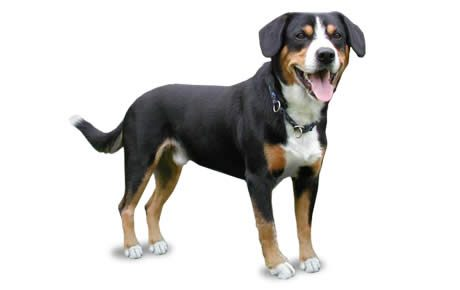

In [0]:
Image(img_path)

## Use the upload in the 'Files' section to upload your own images


In [19]:
!ls

 imagenet			      'images (2).jpg'
'images (10).jpg'		      'images (31).jpg'
'images (13).jpg'		      'images (34).jpg'
'images (14).jpg'		      'images (35).jpg'
'images (16).jpg'		      'images (36).jpg'
'images (17).jpg'		      'images (37).jpg'
'images (18).jpg'		      'images (38).jpg'
'images (19).jpg'		      'images (39).jpg'
'images (1).jpg'		      'images (3).jpg'
'images (1).png'		      'images (40).jpg'
'images - 2020-02-17T125805.626.jpg'  'images (41).jpg'
'images - 2020-02-17T125805.628.jpg'  'images (42).jpg'
'images - 2020-02-17T125805.636.jpg'  'images (43).jpg'
'images - 2020-02-17T125805.637.jpg'  'images (44).jpg'
'images - 2020-02-17T125805.674.jpg'  'images (45).jpg'
'images - 2020-02-17T125805.688.jpg'  'images (46).jpg'
'images - 2020-02-17T125805.699.jpg'  'images (5).jpg'
'images - 2020-02-17T125805.732.jpg'  'images (6).jpg'
'images (20).jpg'		      'images (7).jpg'
'images (21).jpg'		      'images (8).jpg'
'images (22).jpg'		      'images (9).jpg'
'images (

In [29]:
import glob
for file in glob.glob('*.jpg'):
  img_path = os.path.join(file)  
  img = image.load_img(img_path, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = inception_v3.preprocess_input(x)
  print('Input image shape:', x.shape)
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds))
  Image(img_path, width = '300')

Input image shape: (1, 299, 299, 3)
Predicted: [[('n04392985', 'tape_player', 0.130731), ('n02979186', 'cassette_player', 0.05314783), ('n04372370', 'switch', 0.04464549), ('n02978881', 'cassette', 0.040769387), ('n02971356', 'carton', 0.022571968)]]
Input image shape: (1, 299, 299, 3)
Predicted: [[('n03666591', 'lighter', 0.28810725), ('n04192698', 'shield', 0.26648295), ('n02840245', 'binder', 0.08901705), ('n07248320', 'book_jacket', 0.03711153), ('n03642806', 'laptop', 0.032764897)]]
Input image shape: (1, 299, 299, 3)
Predicted: [[('n02840245', 'binder', 0.1219785), ('n03916031', 'perfume', 0.049098957), ('n04548362', 'wallet', 0.031052886), ('n03492542', 'hard_disc', 0.014826681), ('n03794056', 'mousetrap', 0.014217561)]]
Input image shape: (1, 299, 299, 3)
Predicted: [[('n03777754', 'modem', 0.41351008), ('n02978881', 'cassette', 0.1996859), ('n03492542', 'hard_disc', 0.05134321), ('n03706229', 'magnetic_compass', 0.030102596), ('n02992529', 'cellular_telephone', 0.02977034)]]
I

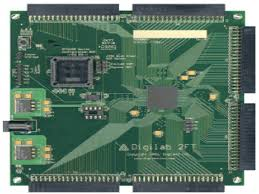

In [25]:
img_path = os.path.join( 'images (31).jpg')
Image(img_path, width = '300')

In [26]:


img_path = os.path.join( 'images (31).jpg')
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 299, 299, 3)
Predicted: [[('n03777754', 'modem', 0.83197916), ('n03857828', 'oscilloscope', 0.046791665), ('n03492542', 'hard_disc', 0.028519876), ('n03782006', 'monitor', 0.011750164), ('n02692877', 'airship', 0.008892188)]]
